In [1]:
!wget https://www.dropbox.com/s/ifge490o16ge2p3/Multiclass%20With%20Bacterial.zip?dl=0

--2020-11-17 16:57:58--  https://www.dropbox.com/s/ifge490o16ge2p3/Multiclass%20With%20Bacterial.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ifge490o16ge2p3/Multiclass%20With%20Bacterial.zip [following]
--2020-11-17 16:57:58--  https://www.dropbox.com/s/raw/ifge490o16ge2p3/Multiclass%20With%20Bacterial.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfe0345fb05c731b2ce943c3bb0.dl.dropboxusercontent.com/cd/0/inline/BDbFs2WZkn9rrDE_XUEbVrQ4jqAe06qkHaae1xjM_bUoVQHsW69O51zPp2JlMmmV7jx6vuGcv-1JLZpG9Ck4SOoguVIl8HWq4MgGrZVuE2DuNJmZv4qzeI8jbAdb8jclUzg/file# [following]
--2020-11-17 16:57:59--  https://ucfe0345fb05c731b2ce943c3bb0.dl.dropboxusercontent.com/cd/0/inline/BDbFs2WZkn9rrDE_XUEbVrQ4jqAe06qkHaae1xjM_bU

In [2]:
!unzip 'Multiclass With Bacterial.zip?dl=0'

Streaming output truncated to the last 5000 lines.
  inflating: Multiclass With Bacterial/DATA/train/COVID/78b60346d1b3bce85353b6dc462d75_jumbo.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7E335538-2F86-424E-A0AB-6397783A38D0.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png  
  inflating: Multiclass With Bacterial/DATA/train/COVID/7-fatal-covid19.jpg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/80b5f00f.jpg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/81af553601a1bc1fdf81c99436a50b_jumbo.jpeg  
  inflating: Multiclass With Bacterial/DATA/train/COVID/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
 

In [3]:
#import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Multiclass With Bacterial/DATA/train'
valid_path = 'Multiclass With Bacterial/DATA/Val'

In [6]:
import keras as keras

In [7]:
# Import the DenseNet121 library as shown below and add preprocessing layer to the front of DenseNet
# Here we will be using imagenet weights

dense = keras.applications.DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

29089792/29084464 [==============================] - 1s 0us/step


In [8]:
# don't train existing weights
for layer in dense.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
folders = glob('Multiclass With Bacterial/DATA/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(dense.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=dense.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [13]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Multiclass With Bacterial/DATA/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4886 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Multiclass With Bacterial/DATA/Val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 943 images belonging to 3 classes.


In [16]:
import keras as keras
METRICS=[
    keras.metrics.Precision(), 
    keras.metrics.Recall(),
    'accuracy',
    keras.metrics.SensitivityAtSpecificity(0.9),
    keras.metrics.SpecificityAtSensitivity(0.9),
]
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
153/153 [==============================] - 110s 719ms/step - loss: 0.8180 - precision: 0.9114 - recall: 0.9097 - accuracy: 0.9106 - sensitivity_at_specificity: 0.9568 - specificity_at_sensitivity: 0.9602 - val_loss: 0.1736 - val_precision: 0.9608 - val_recall: 0.9608 - val_accuracy: 0.9608 - val_sensitivity_at_specificity: 0.9873 - val_specificity_at_sensitivity: 0.9947
Epoch 2/15
153/153 [==============================] - 105s 687ms/step - loss: 0.3897 - precision: 0.9398 - recall: 0.9398 - accuracy: 0.9398 - sensitivity_at_specificity: 0.9726 - specificity_at_sensitivity: 0.9828 - val_loss: 0.2018 - val_precision: 0.9650 - val_recall: 0.9639 - val_accuracy: 0.9639 - val_sensitivity_at_specificity: 0.9852 - val_specificity_at_sensitivity: 0.9926
Epoch 3/15
153/153 [==============================] - 104s 679ms/step - loss: 0.3399 - precision: 0.9494 - recall: 0.9494 - accuracy: 0.9494 - sensitivity_at_specificity: 0.9750 - specificity_at_sensitivity: 0.9877 - val_loss: 0.222

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('model_DenseNet121.h5')

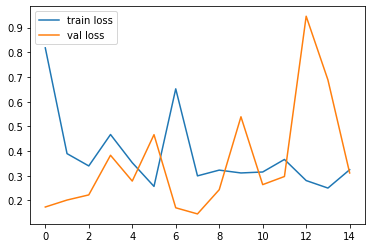

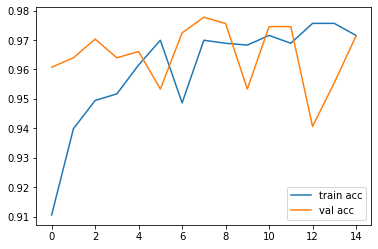

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_directory('Multiclass With Bacterial/DATA/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
accuracy=model.evaluate(validation_set,batch_size=32,return_dict=True)
print(accuracy)

Found 281 images belonging to 3 classes.
9/9 [==============================] - 5s 540ms/step - loss: 0.5509 - precision: 0.9537 - recall: 0.9537 - accuracy: 0.9537 - sensitivity_at_specificity: 0.9609 - specificity_at_sensitivity: 0.9804
{'loss': 0.5509160161018372, 'precision': 0.9537366628646851, 'recall': 0.9537366628646851, 'accuracy': 0.9537366628646851, 'sensitivity_at_specificity': 0.9608541131019592, 'specificity_at_sensitivity': 0.9804270267486572}


In [21]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'Multiclass With Bacterial/DATA/test/COVID'
# path to model
#model_path = 'kaggle_covid_dataset_vgg19.h5'
# dimensions of images
img_width, img_height = 224,224

# load the trained model
#model = load_model(model_path)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img/=255.
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=1)
print(classes)

[[1.00000000e+00 1.27218776e-37 3.27805510e-26]
 [3.53448468e-06 7.33902829e-37 9.99996424e-01]
 [1.00000000e+00 0.00000000e+00 1.20259356e-19]
 [1.00000000e+00 0.00000000e+00 9.23102648e-19]
 [1.00000000e+00 0.00000000e+00 1.67190533e-26]
 [1.00000000e+00 3.69741445e-35 1.62502378e-24]
 [1.00000000e+00 3.28644142e-35 1.78678225e-10]
 [4.83792752e-01 0.00000000e+00 5.16207278e-01]
 [1.00000000e+00 4.61648489e-28 1.72643433e-16]
 [1.00000000e+00 0.00000000e+00 3.01592637e-33]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 4.01827854e-23]
 [1.00000000e+00 0.00000000e+00 2.39129373e-21]
 [9.99268353e-01 6.10385439e-26 7.31614127e-04]
 [1.00000000e+00 0.00000000e+00 4.53116453e-22]
 [9.99999881e-01 2.41641231e-34 1.12166155e-07]
 [9.99717653e-01 9.52114283e-27 2.82336201e-04]
 [1.00000000e+00 0.00000000e+00 5.75644109e-32]
 [9.97162521e-01 7.29348183e-37 2.83745793e-03]
 [1.00000000e+00 1.06155612e-27 1.12021742e-20]]
